# Lending club case study

### Data understanding
Problem Statement: \
The objective is to identify predictors of default so that at the time of loan application, company can use
those variables for approval/rejection of the loan. 

Understanding Variables: 
- Loan status is dependent,everything else is independent.
- Loan_amt is the amount requested by borrower, funded_amt is amount approved by agency, funded_amt_inv is the amount agreed by investor. 
- 3 types of variables: 
> Customer behaviour \
> Loan characteristic \
> Demographic

### Import all libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read dataset

In [ ]:
loan = pd.read_csv("loan.csv")

### Print head

In [2]:
print(loan.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

### Shape of file

In [3]:
loan.shape


(39717, 111)

### All columns in the file


In [4]:
columns = list(loan.columns)
columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

### Dtypes

In [5]:
loan.dtypes 

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
loan.shape


(39717, 111)

## Data Cleaning

### Get null values

In [7]:
data_null = loan.isnull().sum() == 0
print(loan.isnull().sum())
#There are zero empty rows

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


### Check for duplicate rows in dataset based on id column

In [8]:
duplicate_loan=loan[loan.duplicated(['id'])]
duplicate_loan.count()
#There are no duplicate rows

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                             ..
tax_liens                     0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
Length: 111, dtype: int64

### Remove all columns that are completely empty.

In [9]:
# Find list of columns that have all empty values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
#Remove them...
loan.dropna(how='all', axis=1, inplace=True)
loan.shape

(39717, 57)

In [11]:
nan_cols = [i for i in loan.columns if loan[i].isnull().all()]
print(nan_cols)

[]


## Removing Customer Behaviour Columns
### The below given array has the columns that are related to customer behaviour and the columns that can be removed. These can be removed. We will ignore the Customer behaviour attributes as these will not be known during the time of application.

In [12]:
cust_behaviour = [ 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type'
 ]


In [13]:
#Dropping customer behaviour columns
for col in cust_behaviour:
    loan  = loan.drop(col, axis=1)


### Below columns will have values only once the loan is approved. Hence these columns wont help in analysis. 

In [14]:
col_not_req = [ 'mths_since_last_delinq',
'mths_since_last_record',
'next_pymnt_d' ] 
for col in col_not_req:
    loan = loan.drop(col, axis=1)

In [15]:
loan.shape   

(39717, 33)

In [16]:
loan.head

<bound method NDFrame.head of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... addr_state  \
0       36 months   10.65%       162.87     B        B

## Get percentage of empty cells in columns and rows

### Percentage of empty cells columns

In [17]:
print (loan.isin([' ','NULL',0 ,'NaN', 'NA']).mean())


id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.003248
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.005287
purpose                       0.000000
title                         0.000000
zip_code                      0.000000
addr_state                    0.000000
dti                           0.004608
initial_list_status      

In [18]:
#Columns with more number Null/empty values
loan_null = loan.loc[:, loan.isin([' ','NULL',0 ,'NaN','NA']).mean() > .5]
print(loan_null) 

       collections_12_mths_ex_med  acc_now_delinq  chargeoff_within_12_mths  \
0                             0.0               0                       0.0   
1                             0.0               0                       0.0   
2                             0.0               0                       0.0   
3                             0.0               0                       0.0   
4                             0.0               0                       0.0   
...                           ...             ...                       ...   
39712                         NaN               0                       NaN   
39713                         NaN               0                       NaN   
39714                         NaN               0                       NaN   
39715                         NaN               0                       NaN   
39716                         NaN               0                       NaN   

       delinq_amnt  pub_rec_bankruptcies  tax_liens

In [19]:
#Remove the columns with more number of Null/empty values
loan = loan.loc[:, loan.isin([' ','NULL',0 ,'NaN', 'NA']).mean() < .5]
print(loan)  

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... pymnt_plan  \
0       36 months   10.65%       162.87     B        B2  ...          n   
1       6

### Remove rows with loan stauts 'Current'
### Who is likely to default can be found only for people who have either Fully paid or Charged Off. Hence removing data for 'Current' loan status

In [20]:
loan = loan.loc[loan['loan_status'] != 'Current']
loan.shape


(38577, 27)

### Removing columns like "id", "member_id", "url", "title", "emp_title", "zip_code", "addr_state" which do not contribute to loan defaulting

In [21]:
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "desc"], axis = 1, inplace = True)

In [22]:
loan.shape

(38577, 20)

### Remove columns with same values corresponding to all the rows since they will not be useful to us in any way

In [23]:
same_value = [ 'pymnt_plan',
              'initial_list_status',
              'policy_code']
for col in same_value:
    loan = loan.drop(col, axis=1)

In [24]:
loan.shape

(38577, 17)

## Check for empty rows

In [25]:
loan[pd.isnull(loan).any(axis=1)]
#No empty rows

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
168,2500,2500,2500.00000,36 months,7.51%,77.78,A,A3,NaN,OWN,12000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,CA,16.30
323,18000,18000,18000.00000,60 months,17.58%,452.98,D,D4,NaN,MORTGAGE,60000.0,Verified,Dec-11,Fully Paid,debt_consolidation,AL,21.96
394,4000,4000,4000.00000,36 months,11.71%,132.31,B,B3,NaN,RENT,24000.0,Source Verified,Dec-11,Fully Paid,home_improvement,FL,7.50
422,1000,1000,1000.00000,36 months,14.65%,34.50,C,C3,NaN,RENT,18408.0,Not Verified,Dec-11,Charged Off,major_purchase,NJ,6.00
439,8250,8250,8250.00000,36 months,7.51%,256.67,A,A3,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,debt_consolidation,MD,17.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,10000,10000,9975.00000,36 months,14.22%,342.85,C,C5,NaN,RENT,45000.0,Not Verified,Jan-10,Fully Paid,small_business,PA,4.51
32608,3700,3700,3700.00000,36 months,14.22%,126.86,C,C5,NaN,RENT,17496.8,Not Verified,Jan-10,Fully Paid,other,TX,3.36
32621,10000,10000,9731.17513,36 months,14.22%,342.85,C,C5,NaN,MORTGAGE,36000.0,Not Verified,Jan-10,Charged Off,other,MA,3.83
32631,6000,6000,6000.00000,36 months,12.73%,201.40,C,C1,NaN,MORTGAGE,60000.0,Not Verified,Jan-10,Fully Paid,moving,MN,12.80


## Standardizing Dataset

In [26]:
##  Check for missing values in the columns
(loan.isna().sum()/len(loan.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
dtype: float64

In [27]:
#### *Note: We see that emp_length has missing values

print("Mode : " + loan.emp_length.mode()[0])
loan.emp_length.value_counts()

#Also, since the emp_length is 10+ years for max number of rows and the next count is way less hence we can impute the blank values with mode. 
#Though we will not impute in this scenario as suggeseted by trainers.

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### Remove '%' from int_rate and convert to numeric for better data analysis

In [28]:
loan['int_rate'] = loan['int_rate'].map(lambda x: x.rstrip('%'))
print(loan)

       loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months    10.65   
1           2500         2500           2500.0   60 months    15.27   
2           2400         2400           2400.0   36 months    15.96   
3          10000        10000          10000.0   36 months    13.49   
5           5000         5000           5000.0   36 months     7.90   
...          ...          ...              ...         ...      ...   
39712       2500         2500           1075.0   36 months     8.07   
39713       8500         8500            875.0   36 months    10.28   
39714       5000         5000           1325.0   36 months     8.07   
39715       5000         5000            650.0   36 months     7.43   
39716       7500         7500            800.0   36 months    13.75   

       installment grade sub_grade emp_length home_ownership  annual_inc  \
0           162.87     B        B2  10+ years           RENT     24000.

In [29]:
### Remove 'months' from term for better data analysis
loan['term'] = loan['term'].map(lambda x: x.rstrip('months'))
print(loan)

       loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  installment  \
0           5000         5000           4975.0   36     10.65       162.87   
1           2500         2500           2500.0   60     15.27        59.83   
2           2400         2400           2400.0   36     15.96        84.33   
3          10000        10000          10000.0   36     13.49       339.31   
5           5000         5000           5000.0   36      7.90       156.46   
...          ...          ...              ...   ...      ...          ...   
39712       2500         2500           1075.0   36      8.07        78.42   
39713       8500         8500            875.0   36     10.28       275.38   
39714       5000         5000           1325.0   36      8.07       156.84   
39715       5000         5000            650.0   36      7.43       155.38   
39716       7500         7500            800.0   36     13.75       255.43   

      grade sub_grade emp_length home_ownership  annual_inc  \


In [30]:
#emp_length before removing '<' ,'+','Years' and 'Year'
print(loan['emp_length'])

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object


In [31]:
#Removing '<' ,'+','Years' and 'Year' for better analysis
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
print(loan['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38577, dtype: object


In [32]:
loan.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

In [33]:
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

# Data Analysis:

In [34]:
#Header data
loan.head

<bound method NDFrame.head of        loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  installment  \
0           5000         5000           4975.0   36     10.65       162.87   
1           2500         2500           2500.0   60     15.27        59.83   
2           2400         2400           2400.0   36     15.96        84.33   
3          10000        10000          10000.0   36     13.49       339.31   
5           5000         5000           5000.0   36      7.90       156.46   
...          ...          ...              ...   ...      ...          ...   
39712       2500         2500           1075.0   36      8.07        78.42   
39713       8500         8500            875.0   36     10.28       275.38   
39714       5000         5000           1325.0   36      8.07       156.84   
39715       5000         5000            650.0   36      7.43       155.38   
39716       7500         7500            800.0   36     13.75       255.43   

      grade sub_grade emp_length 

<Axes: >

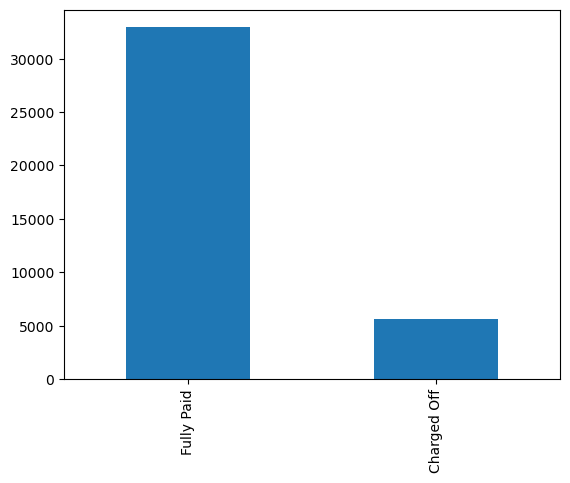

In [35]:
#Count of 'Charged Off' and 'Fully Paid'
loan['loan_status'].value_counts().plot(kind='bar')


### Univariate Analysis on loan_amount

In [36]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: >

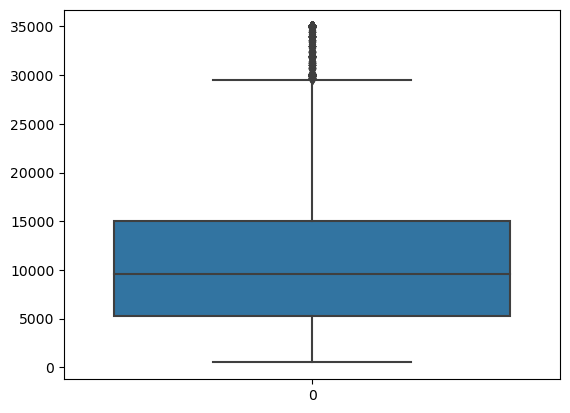

In [37]:
sns.boxplot(loan.loan_amnt)

### Observation
Most of the loan amount lies between 5000 and 15000

### Univariate Analysis on annual_inc

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


<Axes: >

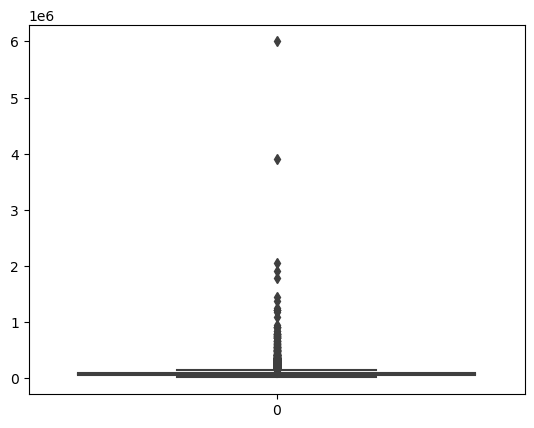

In [38]:
print(loan['annual_inc'].describe())
sns.boxplot(loan.annual_inc)

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64


<Axes: >

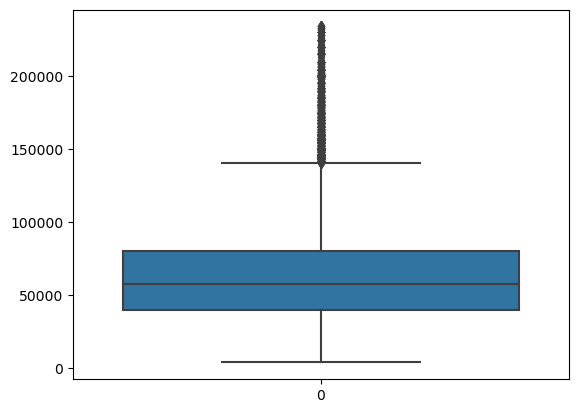

In [39]:
### Above graph shows the presence of Outliers. Let's analyze the Outliers better in the next step.
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.96, 0.97,0.98, 0.99])
print(quantile_info)
#Let's remove outliers with quantile .99 and plot the boxplot again
annual_inc_99 = loan['annual_inc'].quantile(0.99)
loan = loan[loan.annual_inc <= annual_inc_99]
sns.boxplot(loan.annual_inc)

### Univariate Analysis on funded_amnt

count    38191.000000
mean     10703.329973
std       7011.076206
min        500.000000
25%       5100.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


<Axes: >

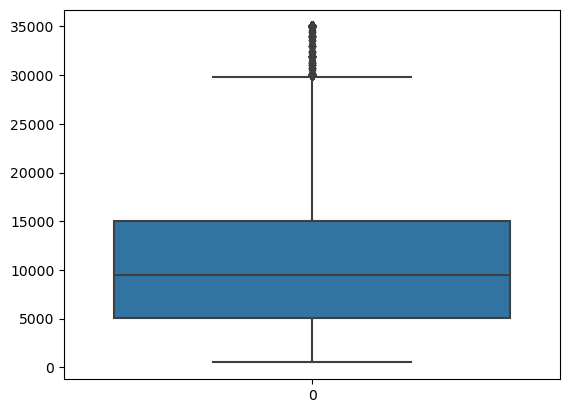

In [40]:
print(loan['funded_amnt'].describe())
sns.boxplot(loan.funded_amnt)

### Univariate Analysis on funded_amnt_inv

count    38191.000000
mean     10146.556380
std       6943.535384
min          0.000000
25%       5000.000000
50%       8575.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


<Axes: >

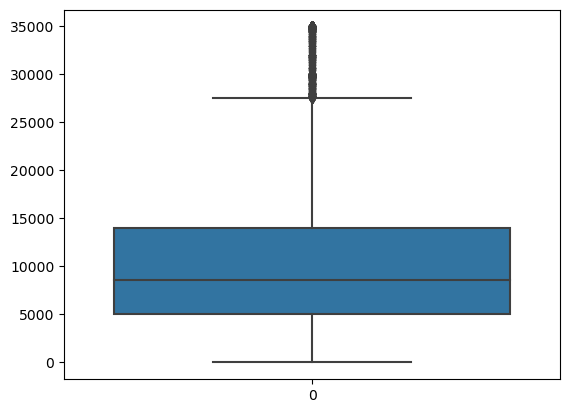

In [41]:
print(loan['funded_amnt_inv'].describe())
sns.boxplot(loan.funded_amnt_inv)

### Univariate Analysis on int_rate

count     38191
unique      370
top       10.99
freq        904
Name: int_rate, dtype: object


<Axes: >

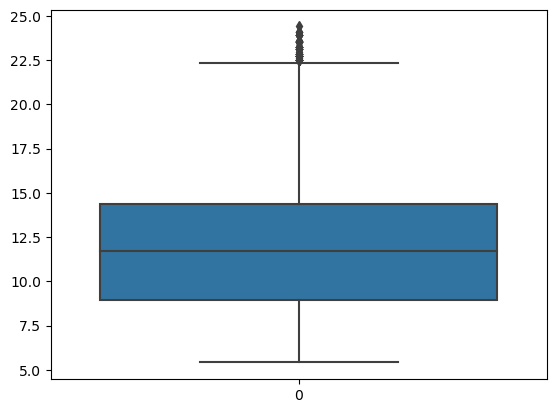

In [42]:
print(loan['int_rate'].describe())
sns.boxplot(loan.int_rate)

#### *Observations: 
Interest rate for maximum borrower's lies between 9-15%

### Univariate Analysis on annual_inc

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64


<Axes: >

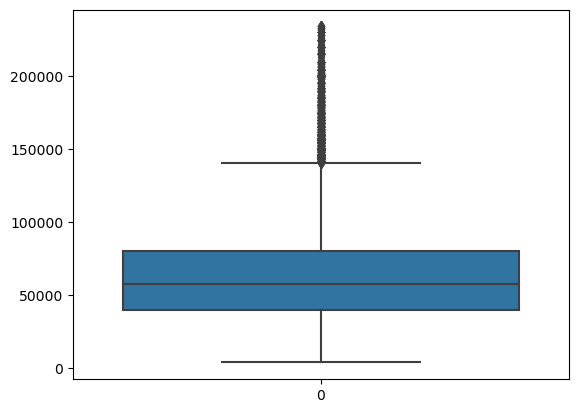

In [43]:
print(loan['annual_inc'].describe())
sns.boxplot(loan.annual_inc)

#### *Observations: 
Most of the borrower's annual incomes lies between 40000-80000

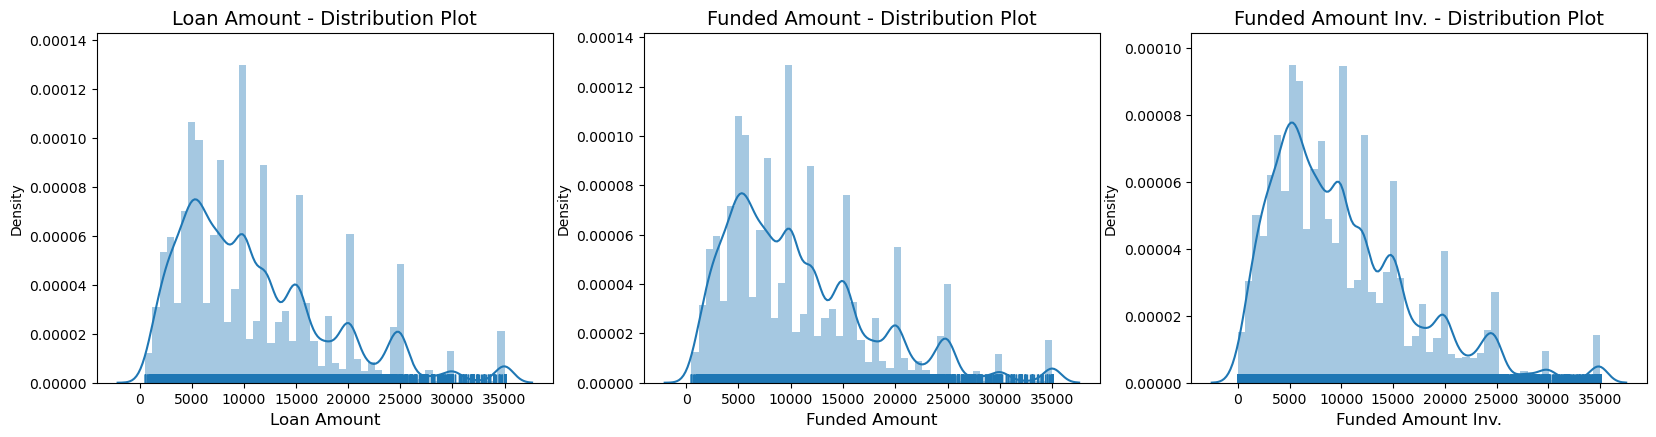

In [44]:
# Distribution of three types of loan amount fields
plt.figure(figsize=(20,10))
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=12)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14)
ax.set_xlabel('Funded Amount',fontsize=12)
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14)
ax.set_xlabel('Funded Amount Inv.',fontsize=12)
plt.show()

### Observation
Loan amount, funded amount and funded amount Inv follows the same pattern

In [45]:
#sns.pairplot(loan, hue="loan_status")
#plt.show()

In [46]:
#maximum loan amount
loan.loan_amnt.max()

35000

In [47]:

# categorise loan amounts, annual incomes, intrest rates , dti and funded amount inv into bins for further analysis
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

loan['int_rate_cats'] = pd.cut(loan['int_rate'].astype(float), [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

loan["fnded_Amnt_Category"] = pd.cut(loan.funded_amnt_inv, [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

print(loan["fnded_Amnt_Category"])
loan_good = loan[loan["loan_status"] == 'Fully Paid']
loan_bad = loan[loan["loan_status"] == 'Charged Off']

0            0-7000
1            0-7000
2            0-7000
3        7000-14000
5            0-7000
            ...    
39712        0-7000
39713        0-7000
39714        0-7000
39715        0-7000
39716        0-7000
Name: fnded_Amnt_Category, Length: 38191, dtype: category
Categories (5, object): ['0-7000' < '7000-14000' < '14000-21000' < '21000-28000' < '28000 +']


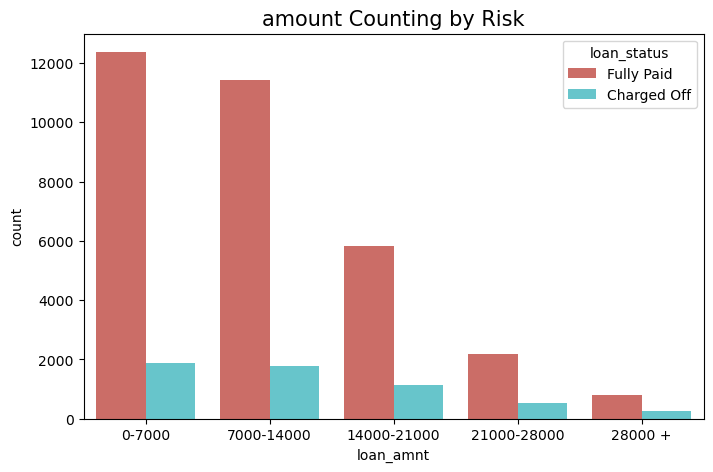

In [48]:
ax = plt.subplots(nrows=1, figsize=(8,5))
#lt.subplots_adjust(hspace = 0.4, top = 0.8)
g2 = sns.countplot(x="loan_amnt_cats",data=loan, 
              palette="hls", ax=ax[1], 
              hue = "loan_status")
g2.set_title("amount Counting by Risk", fontsize=15)
g2.set_xlabel("loan_amnt")
plt.show()

<Axes: xlabel='fnded_Amnt_Category', ylabel='Count'>

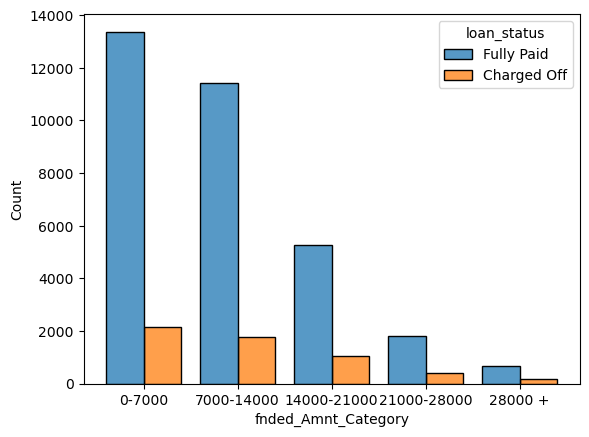

In [49]:
sns.histplot(binwidth=0.5, x="fnded_Amnt_Category", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8) 

Higher the loan amount, greater the chance of getting defaulted.


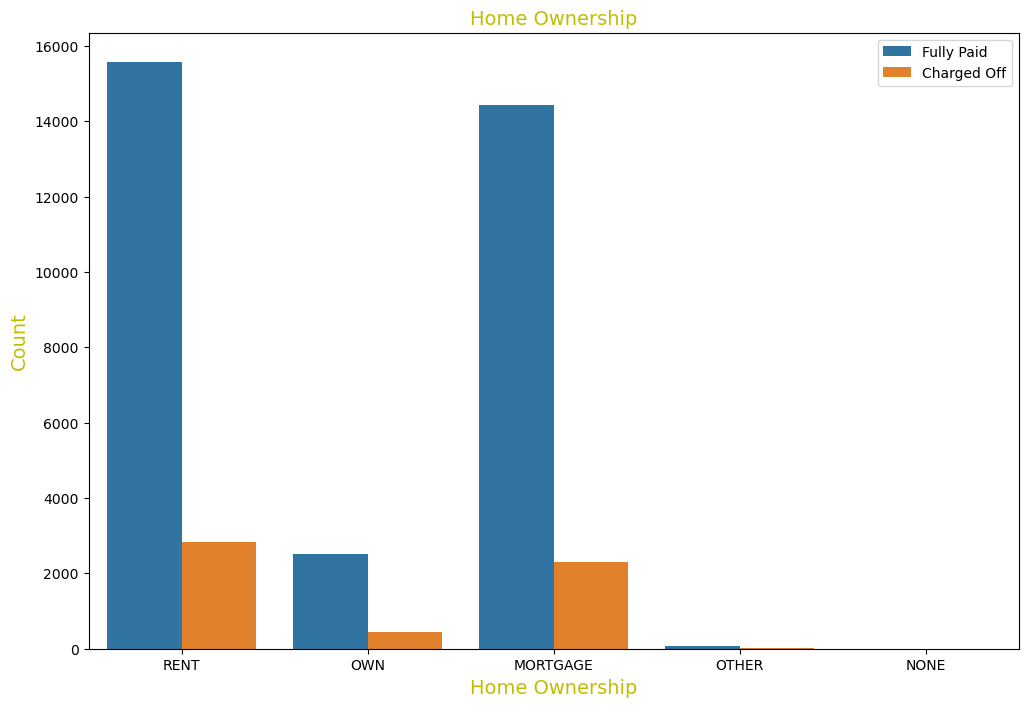

In [51]:
# Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(12,8),facecolor='w')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='y')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'y')
ax.set_ylabel('Count',fontsize=14,color = 'y')      
plt.show()

### Observations
### Check relation between loan status and home ownership.
Most of the applicants are either living in rented or mortgaged house. Also, the number of charged off loans are high for people who are living in rented or mortgaged house.
Also, from this we can infer that, it is risky to give loan for people with ownership type 'Rent' and 'Mortage'.



### Check relation between loan status and Annual Income.
This shows that more number of defaulters are people with less annual income. Defaulters are less when annual income is high. \
Also, from this we can infer that, it is risky to give loan for people with less annual income.

<Axes: xlabel='annual_inc_cats', ylabel='Count'>

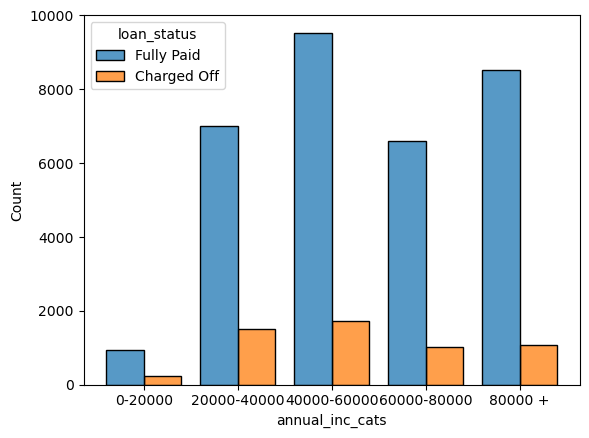

In [52]:
sns.histplot(binwidth=0.5, x="annual_inc_cats", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8) 

### Observation
If we look at the ratio of charged offs, proportion is high for lower annual income. We will show deeper analysis of this in the later part of the case study.

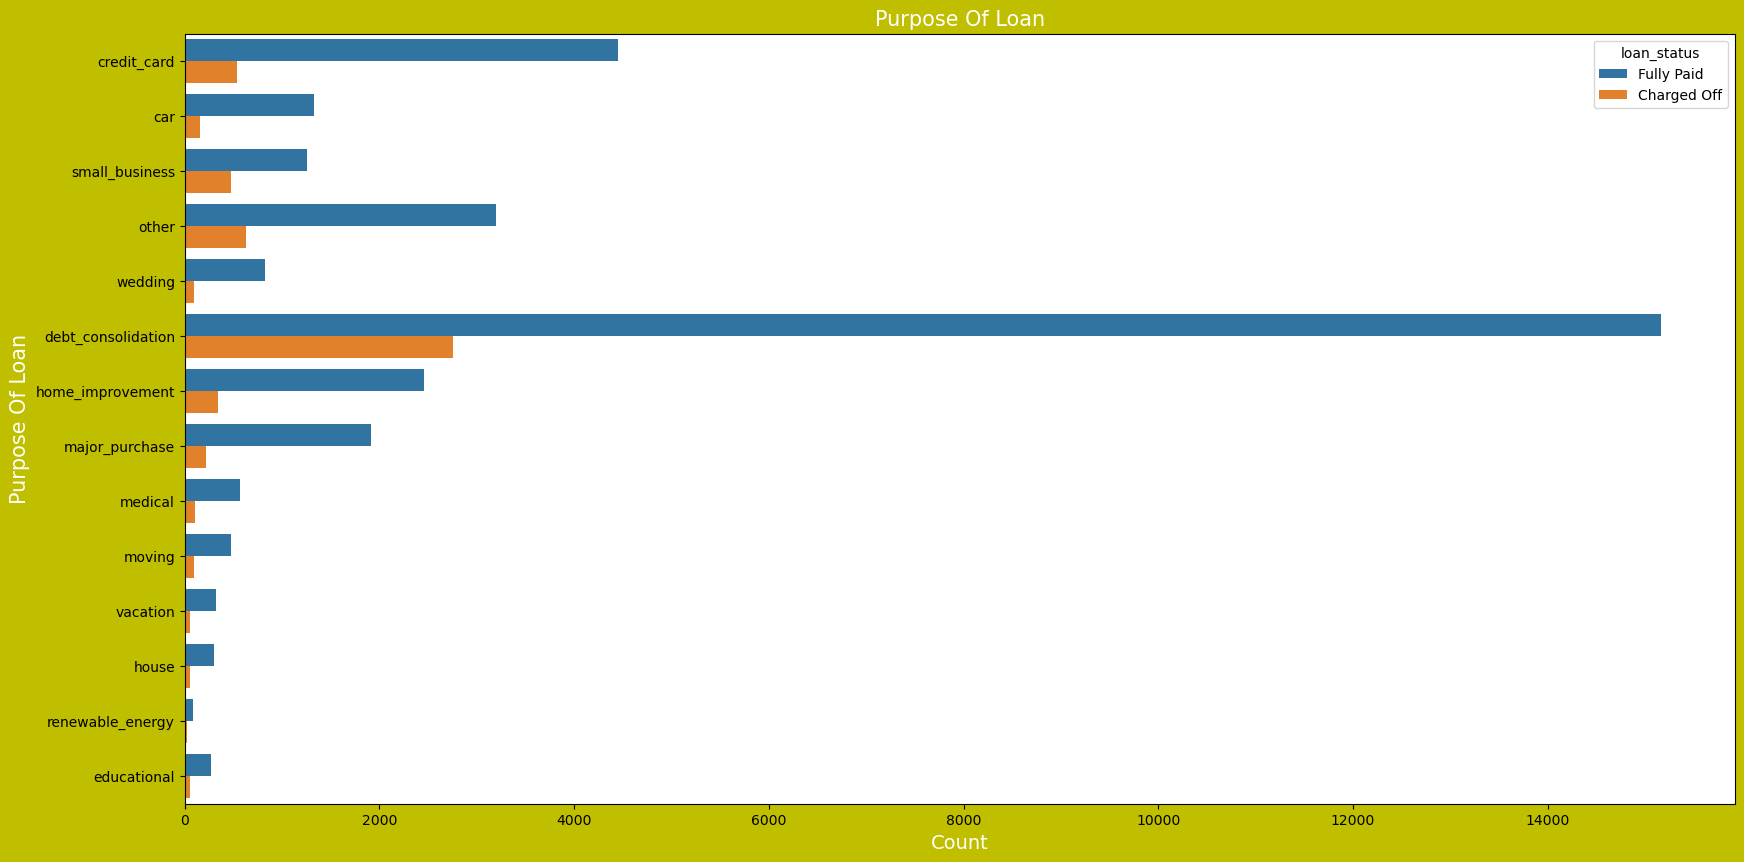

In [53]:
#Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(20,10),facecolor='y')
ax = sns.countplot(y="purpose",data=loan,hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=15,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=15,color = 'w')
ax.set_xlabel('Count',fontsize=14,color = 'w')      
plt.show()

### *Observations:
Above plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill. Number of chraged off loans are also high these loans. Also, if we look at the ratio of charged offs, proportion is high for small businesses. We will show deeper analysis of this in the later part of the case study.

<Axes: xlabel='annual_inc_cats', ylabel='funded_amnt_inv'>

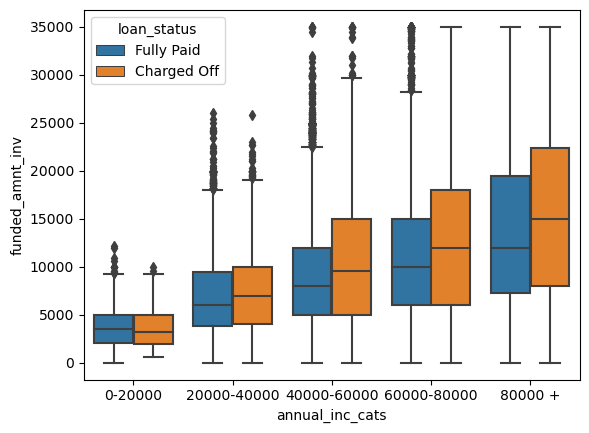

In [54]:
sns.boxplot(data=loan, x="annual_inc_cats", y="funded_amnt_inv", hue="loan_status", order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None)


### Observation
More the annual income, more is the funded amount invested and could be the reason for more defaulters.

In [55]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,addr_state,dti,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats,fnded_Amnt_Category
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,Dec-11,Fully Paid,credit_card,AZ,27.65,0-7000,20000-40000,10-13,NaN,0-7000
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,Dec-11,Charged Off,car,GA,1.00,0-7000,20000-40000,12.5-16,0-5,0-7000
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,Dec-11,Fully Paid,small_business,IL,8.72,0-7000,0-20000,12.5-16,05-10,0-7000
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,Dec-11,Fully Paid,other,CA,20.00,7000-14000,40000-60000,12.5-16,15-20,7000-14000
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,Dec-11,Fully Paid,wedding,AZ,11.20,0-7000,20000-40000,0-10,10-15,0-7000


<Axes: xlabel='verification_status', ylabel='Count'>

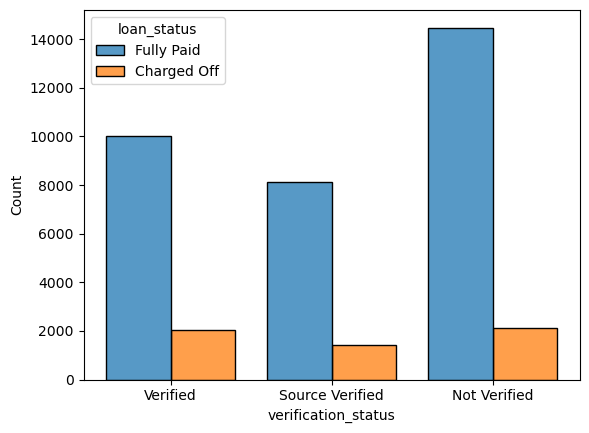

In [56]:
sns.histplot(binwidth=0.5, x="verification_status", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8)

### Observation
Charged offs are more for 'Not verified' and 'Verified'. Source verified has less number of charged offs.

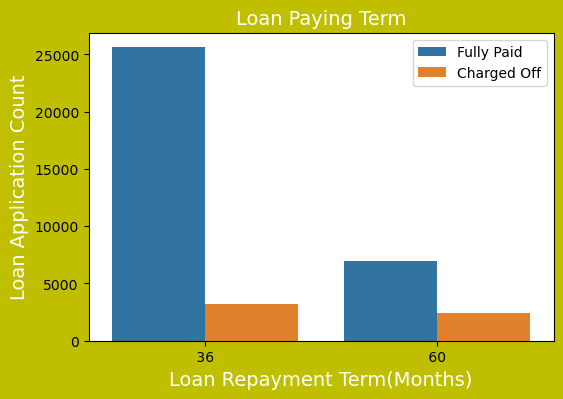

In [57]:
# Ordered Categorical Variables- Loan  Term

plt.figure(figsize=(6,4),facecolor='y')
ax = sns.countplot(x="term",data=loan,hue='loan_status')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term(Months)',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

### *Observations:
Charged Off loans are more for loans where Loan term is 36 months which means people tend to charge off when the loan term is less.



In [58]:
loan.installment.max()

1305.19

In [59]:
#Interval of installment for better analysis
interval_inst = (0, 200, 400, 600, 800, 1000, 1200, 1400)

loan["InstallmentCateg"] = pd.cut(loan.installment, interval_inst)
loan["InstallmentCateg"] = loan["InstallmentCateg"].astype(str)

In [60]:
print(loan.InstallmentCateg)

0          (0, 200]
1          (0, 200]
2          (0, 200]
3        (200, 400]
5          (0, 200]
            ...    
39712      (0, 200]
39713    (200, 400]
39714      (0, 200]
39715      (0, 200]
39716    (200, 400]
Name: InstallmentCateg, Length: 38191, dtype: object


<Axes: xlabel='Count', ylabel='InstallmentCateg'>

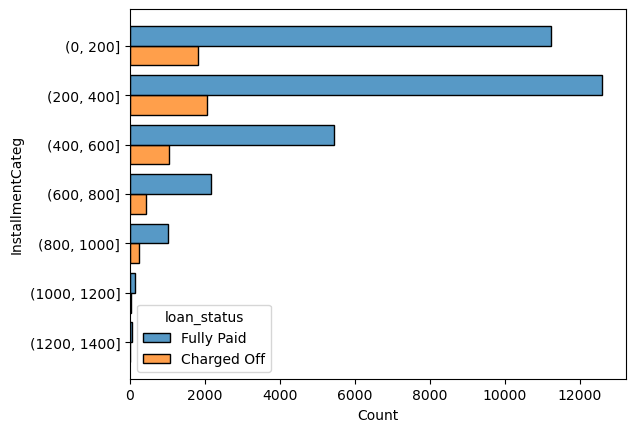

In [61]:
sns.histplot(binwidth=0.5, y="InstallmentCateg", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8)


### Observation
On checking the ratio of charged offs, proportion seems to be more for lesser installments. Lesser the number of installments more the number of charged offs.

<Axes: xlabel='grade', ylabel='Count'>

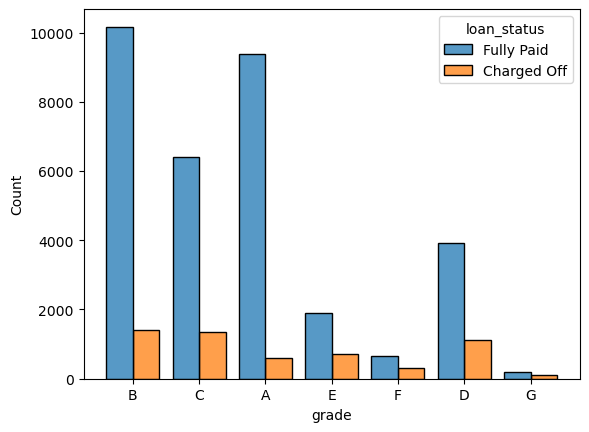

In [62]:
sns.histplot(binwidth=0.5, x="grade", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8)


### Observation
More number of loans and charged offs are for A, B and C.
But, if we look at the ratio of charged offs, proportion is high for E, F and G. We will show deeper analysis of this in the later part of the case study.

<Axes: xlabel='Count', ylabel='sub_grade'>

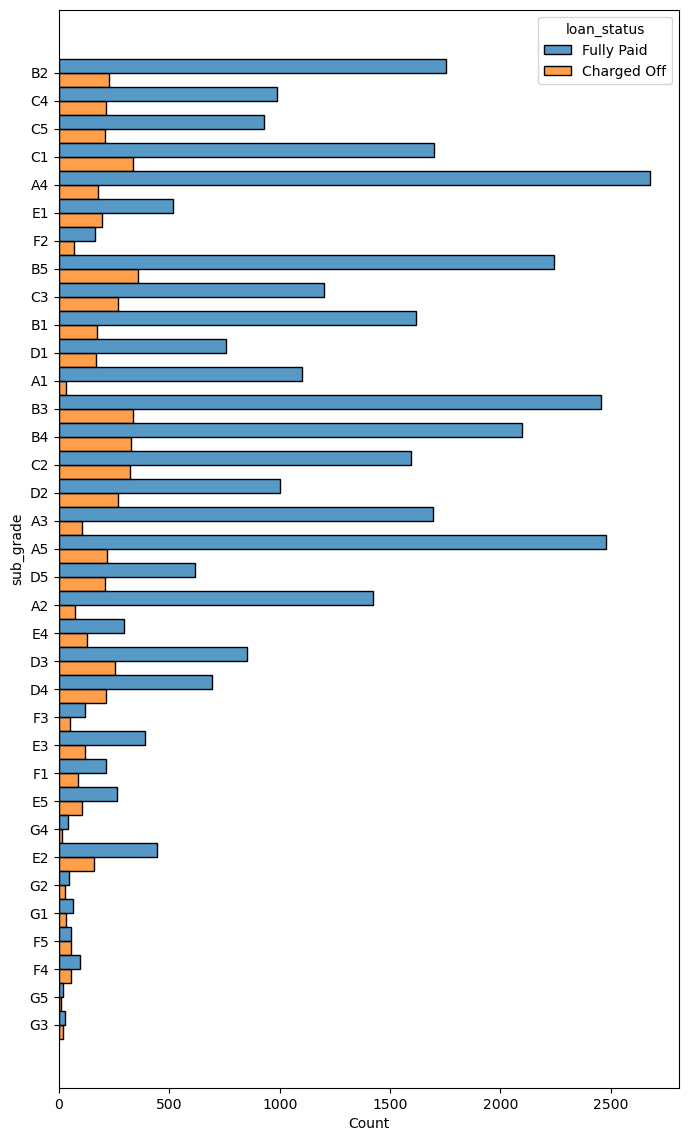

In [63]:
plt.figure(figsize=(8,14))
sns.histplot(binwidth=0.5, y="sub_grade", hue="loan_status", data=loan, stat="count", multiple="dodge")


### Observation
More number of loans and charged offs are for A4, B3, A5 and B5. But, if we look at the ratio of charged offs, proportion is high for F5, G2 and G3. We will show deeper analysis of this in the later part of the case study.

<Axes: xlabel='Count', ylabel='addr_state'>

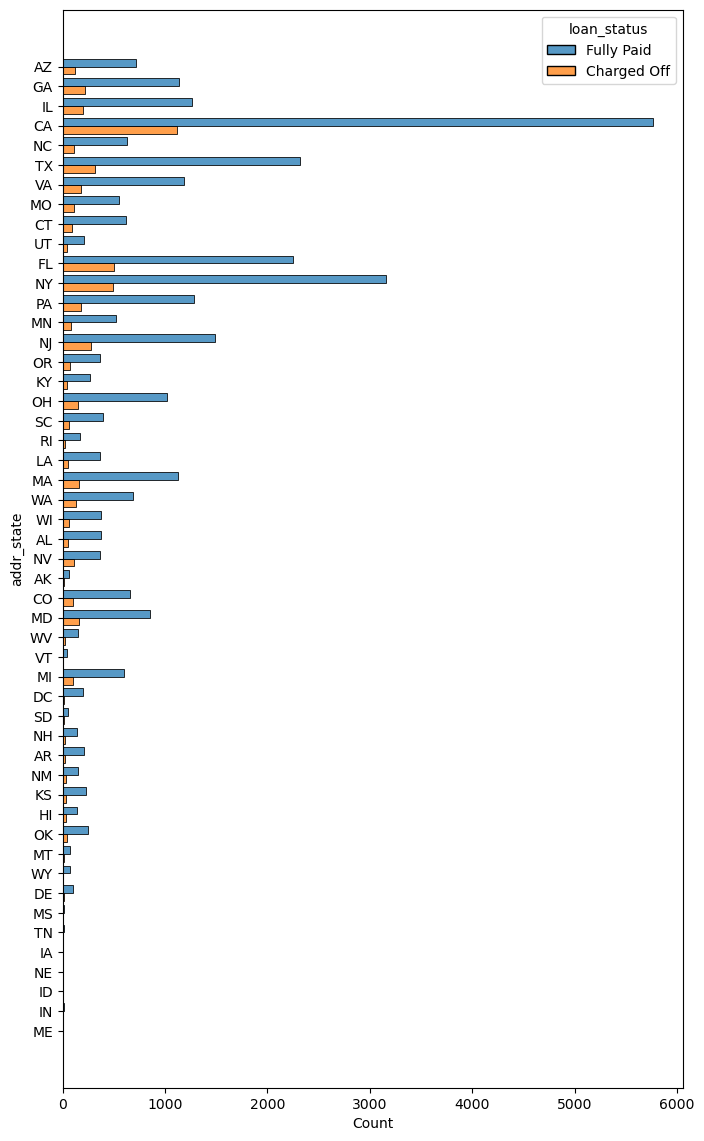

In [64]:
plt.figure(figsize=(8,14))
sns.histplot(binwidth=0.5, y="addr_state", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8)


### Observation
CA has maximum 'Charged Off' and maximum number of loan applicants.

<Axes: xlabel='dti_category', ylabel='Count'>

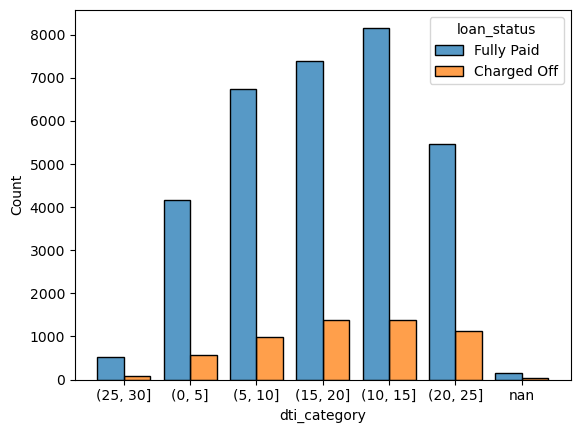

In [65]:
interval_dti = (0, 5, 10, 15, 20, 25, 30, 35)

loan["dti_category"] = pd.cut(loan.dti, interval_dti)
loan["dti_category"] = loan["dti_category"].astype(str)
sns.histplot(binwidth=0.5, x="dti_category", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8)


### Observation
More dti, more the number of charged offs

In [66]:
loan.dti.max()

29.99

In [67]:
#Extracting Month and year from issue_d
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issue_year']=loan['issue_d'].dt.year
loan['issue_month']=loan['issue_d'].dt.month
print(loan['issue_year'])
loan.head()

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 38191, dtype: int64


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats,fnded_Amnt_Category,InstallmentCateg,dti_category,issue_year,issue_month
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,27.65,0-7000,20000-40000,10-13,NaN,0-7000,"(0, 200]","(25, 30]",2011,12
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,1.00,0-7000,20000-40000,12.5-16,0-5,0-7000,"(0, 200]","(0, 5]",2011,12
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,8.72,0-7000,0-20000,12.5-16,05-10,0-7000,"(0, 200]","(5, 10]",2011,12
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,20.00,7000-14000,40000-60000,12.5-16,15-20,7000-14000,"(200, 400]","(15, 20]",2011,12
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,11.20,0-7000,20000-40000,0-10,10-15,0-7000,"(0, 200]","(10, 15]",2011,12


<Axes: xlabel='issue_month', ylabel='Count'>

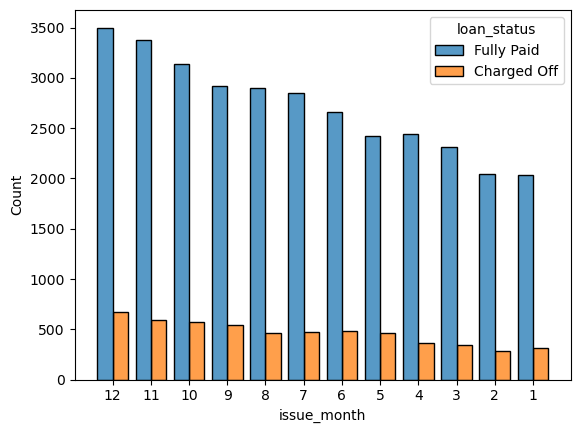

In [68]:
loan['issue_month'] = loan['issue_month'].astype(str)
sns.histplot(binwidth=0.5, x="issue_month", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8)


### Observation
More number of charged offs are in Sep, Oct, Nov and Dec

<Axes: xlabel='issue_year', ylabel='Count'>

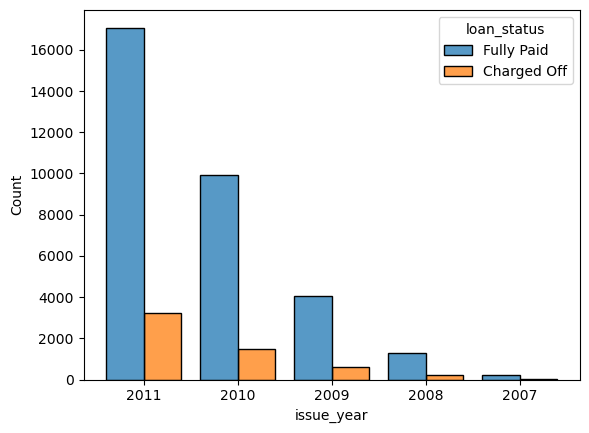

In [69]:
loan['issue_year'] = loan['issue_year'].astype(str)
sns.histplot(binwidth=1, x="issue_year", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8)


### Observation
More number of charged offs are in 2011

In [70]:
# Convert columns from float to numeric to plot correlation amongst them
loan['int_rate'] = loan['int_rate'].astype(float)
loan['emp_length'] = loan['emp_length'] #.astype(float)

corr_col = ['int_rate','funded_amnt_inv','installment','dti','emp_length']
loan[corr_col] = loan[corr_col].apply(pd.to_numeric)



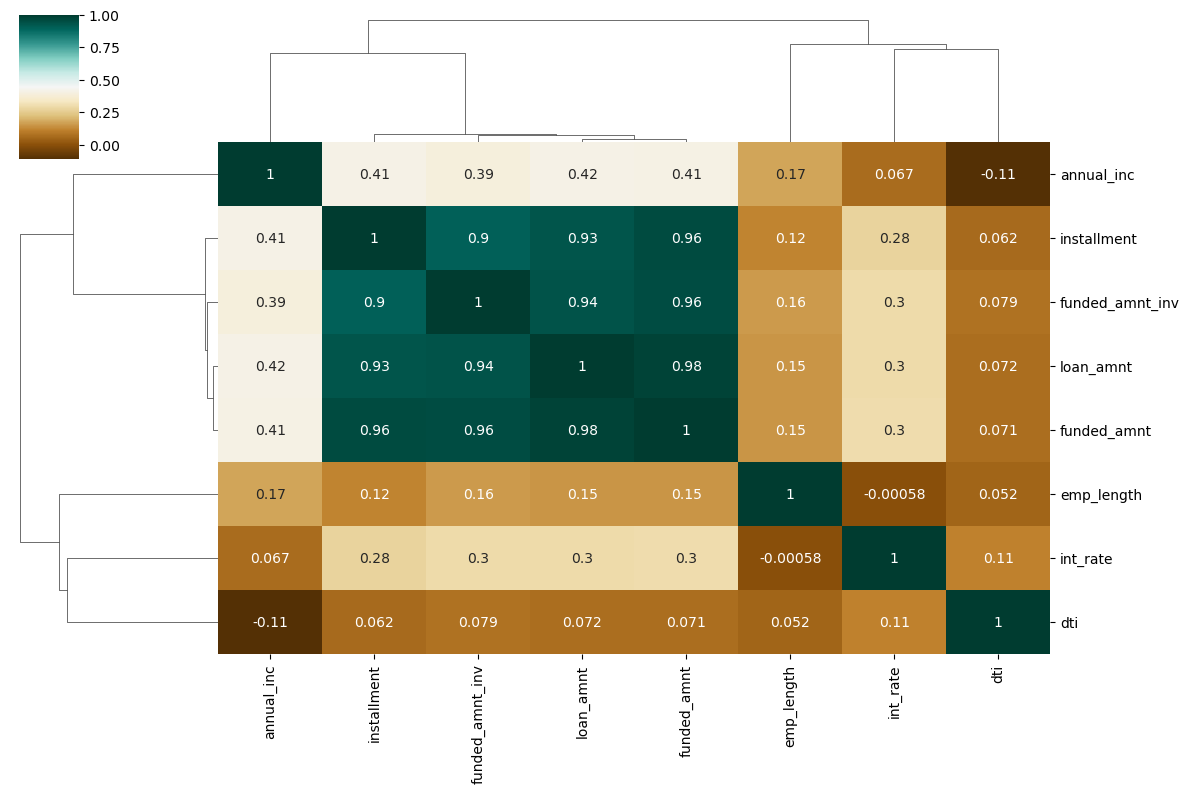

In [71]:
# Bivariate Analysis - Correlation Matrix

loan_correlation = loan.corr()
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

#### Observations: 
Loan amount, investor amount, funding amount are strongly correlated. Annual income with DTI(Debt-to-income ratio) is negatively correalted which means when annual income is low DTI is high & vice versa. Positive correlation between annual income and employment length which means more the work experience more is the annual income.

## Derive Metrics

In [72]:
loan['annual_inc'].max()

234000.0

In [73]:
loan['annual_inc_cats']

0        20000-40000
1        20000-40000
2            0-20000
3        40000-60000
5        20000-40000
            ...     
39712        80000 +
39713        0-20000
39714        80000 +
39715        80000 +
39716    20000-40000
Name: annual_inc_cats, Length: 38191, dtype: category
Categories (5, object): ['0-20000' < '20000-40000' < '40000-60000' < '60000-80000' < '80000 +']

In [74]:
# Annual income Vs Chargedoff_Proportion -

annual_inc_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().reset_index().rename_axis(None, axis=1)
annual_inc_vs_loan['Total'] = annual_inc_vs_loan['Charged Off'] + annual_inc_vs_loan['Fully Paid'] 
annual_inc_vs_loan['Chargedoff_Proportion'] = annual_inc_vs_loan['Charged Off'] / annual_inc_vs_loan['Total']
annual_inc_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

,annual_inc_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1514,7004,8518,0.177741
2,40000-60000,1729,9534,11263,0.153511
3,60000-80000,1024,6597,7621,0.134366
4,80000 +,1080,8529,9609,0.112395


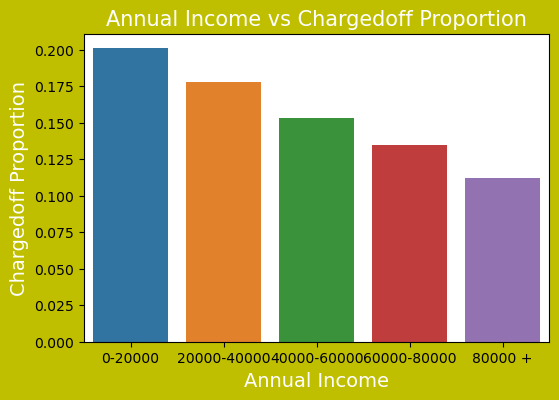

In [75]:
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='y')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x="annual_inc_cats", y="Chargedoff_Proportion", data=annual_inc_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

### Observation
The above plot shows that lower the annual income greater is the chance of getting defaulted(charged off).

In [76]:
# Interest rate Vs Chargedoff_Proportion -

int_rate_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().reset_index().rename_axis(None, axis=1)
int_rate_vs_loan['Total'] = int_rate_vs_loan['Charged Off'] + int_rate_vs_loan['Fully Paid'] 
int_rate_vs_loan['Chargedoff_Proportion'] = int_rate_vs_loan['Charged Off'] / int_rate_vs_loan['Total']
int_rate_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

,int_rate_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1250,3317,4567,0.273703
2,12.5-16,1995,9353,11348,0.175802
1,10-13,1224,8083,9307,0.131514
0,0-10,825,11402,12227,0.067474


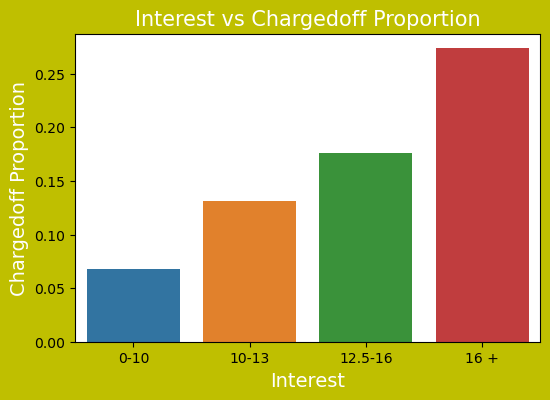

In [77]:
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='y')
ax1.set_title('Interest vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x="int_rate_cats", y="Chargedoff_Proportion", data=int_rate_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Interest',fontsize=14,color='w')
plt.show()

### Observation
The above plot shows that greater the interest rate, greater is the chance of getting defaulted(charged off).

In [78]:
# Grade Vs Chargedoff_Proportion -

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index().rename_axis(None, axis=1)
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,99,190,289,0.342561
5,F,312,642,954,0.327044
4,E,704,1906,2610,0.269732
3,D,1112,3915,5027,0.221205
2,C,1342,6411,7753,0.173094
1,B,1414,10167,11581,0.122097
0,A,601,9376,9977,0.060239


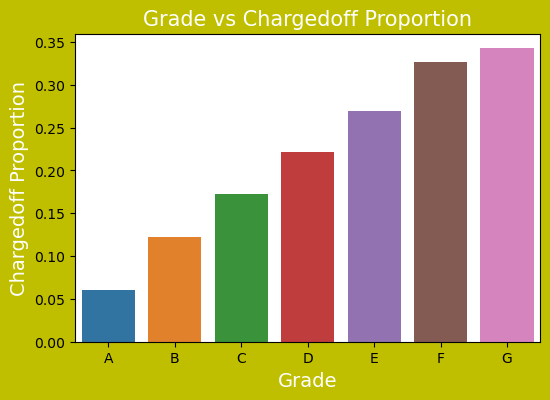

In [79]:
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='y')
ax1.set_title('Grade vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x="grade", y="Chargedoff_Proportion", data=grade_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Grade',fontsize=14,color='w')
plt.show()

### Observation
The above plot shows that highest chance of 'charged off' is for grade 'G'. Chance keeps increasing from A to G.

In [80]:
# SubGrade Vs Chargedoff_Proportion -

subgrade_vs_loan = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().reset_index().rename_axis(None, axis=1)
subgrade_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Fully Paid'] 
subgrade_vs_loan['Chargedoff_Proportion'] = subgrade_vs_loan['Charged Off'] / subgrade_vs_loan['Total']
subgrade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,53,55,108,0.490741
32,G3,19,25,44,0.431818
31,G2,27,47,74,0.364865
34,G5,10,18,28,0.357143
28,F4,52,96,148,0.351351
30,G1,31,61,92,0.336957
23,E4,126,293,419,0.300716
26,F2,69,162,231,0.298701
27,F3,50,118,168,0.297619
25,F1,88,211,299,0.294314


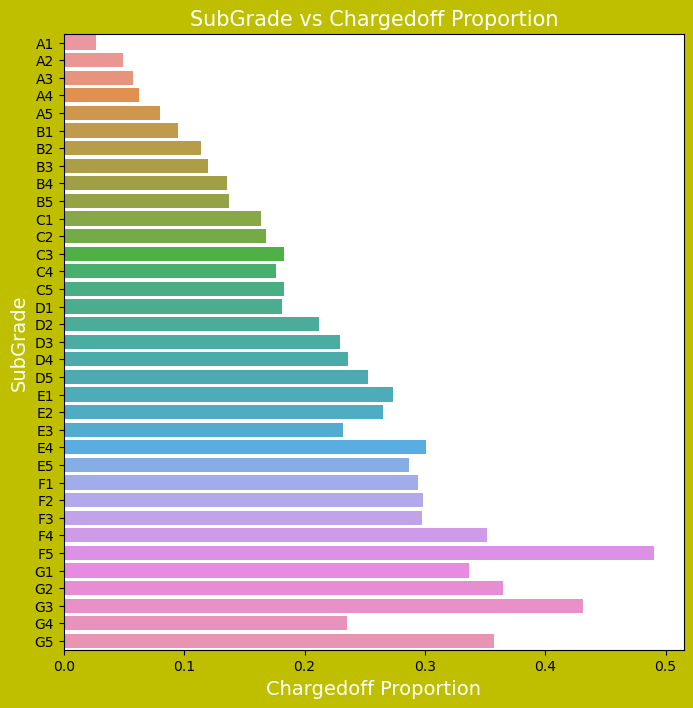

In [81]:
fig, ax1 = plt.subplots(figsize=(8, 8),facecolor='y')
ax1.set_title('SubGrade vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y="sub_grade", x="Chargedoff_Proportion", data=subgrade_vs_loan)
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_ylabel('SubGrade',fontsize=14,color='w')
plt.show()

### Observation
The above plot shows that highest chance of 'charged off' is for sub grade 'F5', 'G2' and 'G3'.

In [82]:
# DTI Vs Chargedoff_Proportion -

dti_vs_loan = loan.groupby(['dti_cats', 'loan_status']).loan_status.count().unstack().reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off'] + dti_vs_loan['Fully Paid'] 
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,25+,1116,5455,6571,0.169837
3,15-20,1385,7399,8784,0.157673
2,10-15,1392,8164,9556,0.145668
1,05-10,996,6749,7745,0.128599
0,0-5,580,4157,4737,0.122440


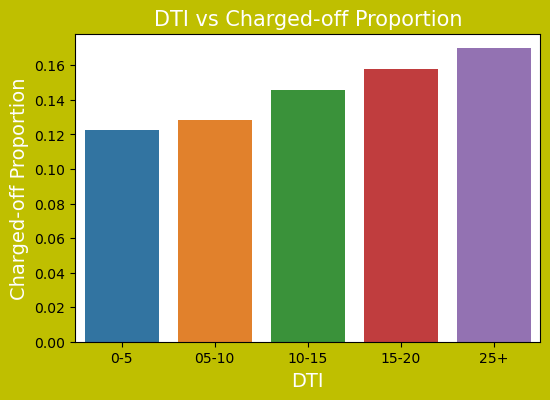

In [83]:
fig, ax1 = plt.subplots(figsize=(6, 4),facecolor='y')

ax1.set_title('DTI vs Charged-off Proportion',fontsize=15,color = 'w')

ax1=sns.barplot(x="dti_cats", y="Chargedoff_Proportion", data=dti_vs_loan)

ax1.set_ylabel('Charged-off Proportion',fontsize=14,color = 'w')

ax1.set_xlabel('DTI',fontsize=14,color='w')

plt.show()

### *Observations:
Applicants with low DTI have low chances of getting Charged Off. Above plot shows slight increase in Charged Off rate with increase in DTI.

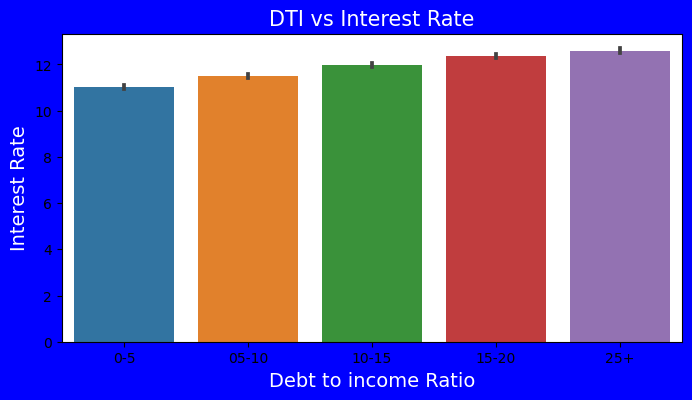

In [84]:
plt.figure(figsize=(8,4),facecolor='b')

ax = sns.barplot(y='int_rate', x='dti_cats', data =loan)

ax.set_title('DTI vs Interest Rate',fontsize=15,color='w')

ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')

ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'w')

plt.show()

### *Observations:
If your DTI is low you may get a lower interest rate. Above plot shows slight increase in interest rate with increase in DTI.

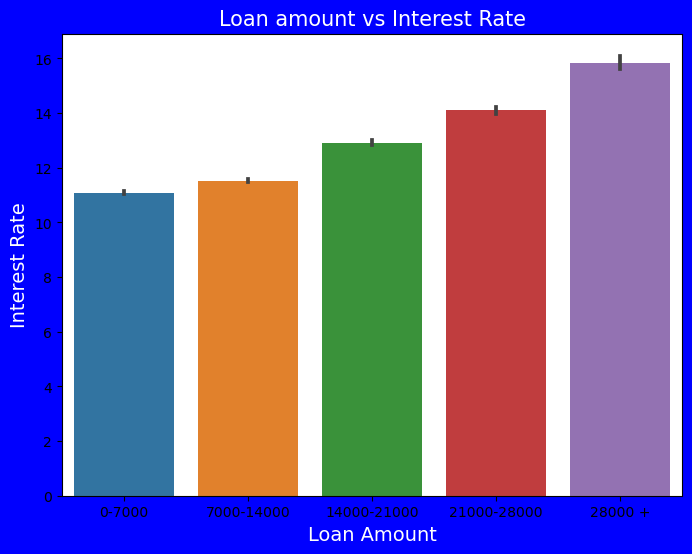

In [85]:
#Loan Amount vs Interest Rate

 

plt.figure(figsize=(8,6),facecolor='b')
ax = sns.barplot(y='int_rate', x='loan_amnt_cats', data =loan)
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

### *Observations:
As per above plot, more the loan amount more is the interest rate

In [86]:
# Purpose of Loan Vs Chargedoff_Proportion -

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,472,1251,1723,0.273941
10,renewable_energy,19,81,100,0.190000
3,educational,55,268,323,0.170279
9,other,629,3202,3831,0.164187
5,house,58,299,357,0.162465
8,moving,91,479,570,0.159649
7,medical,106,568,674,0.157270
2,debt_consolidation,2752,15165,17917,0.153597
12,vacation,53,322,375,0.141333
4,home_improvement,338,2459,2797,0.120844


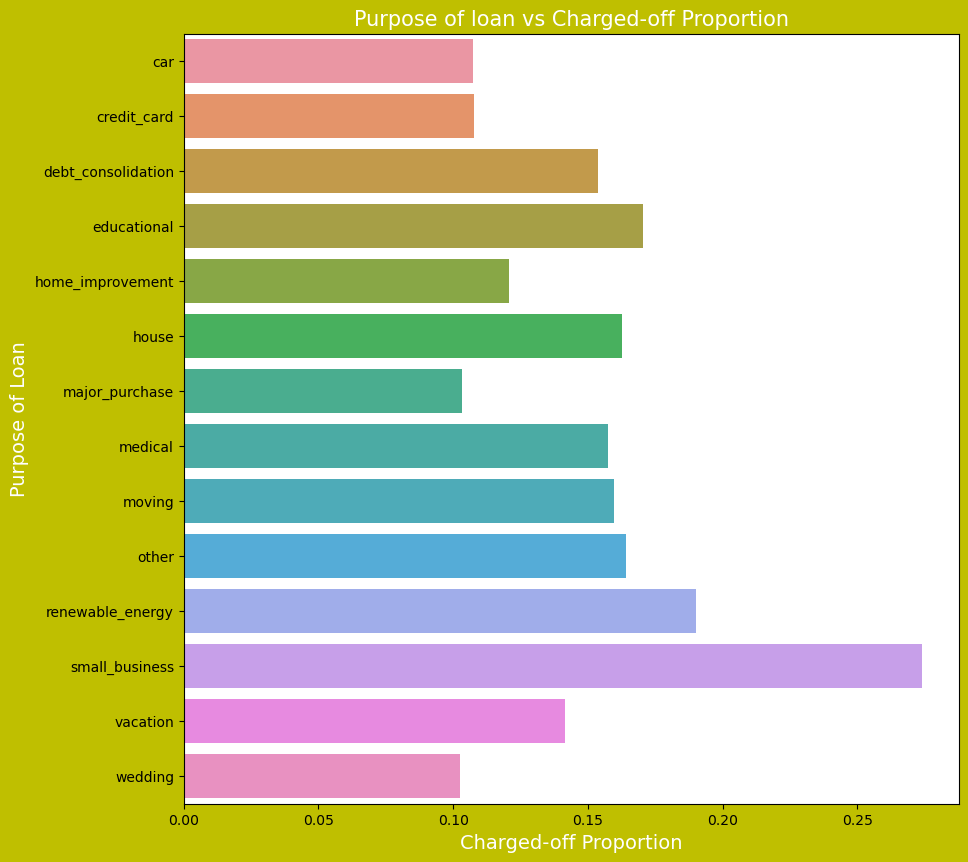

In [87]:
#Purpose of Loan vs Charged Off proportion
fig, ax1 = plt.subplots(figsize=(10, 10),facecolor='y')

ax1.set_title('Purpose of loan vs Charged-off Proportion',fontsize=15,color = 'w')

ax1=sns.barplot(y="purpose", x="Chargedoff_Proportion", data=purpose_vs_loan)

ax1.set_xlabel('Charged-off Proportion',fontsize=14,color = 'w')

ax1.set_ylabel('Purpose of Loan',fontsize=14,color='w')

plt.show()

### Observation
The above plot shows that defaultor chance is more for loan taken for 'small_business'.

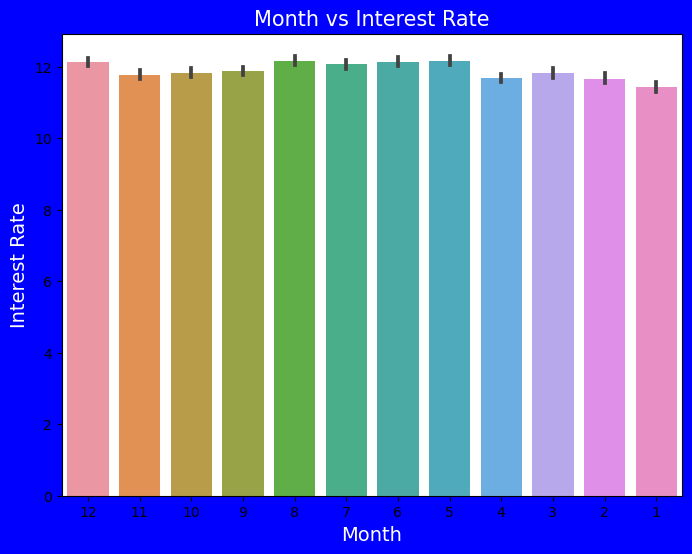

In [88]:
#Month vs Interest Rate
plt.figure(figsize=(8,6),facecolor='b')
ax = sns.barplot(y='int_rate', x='issue_month', data =loan)
ax.set_title('Month vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Month',fontsize=14,color = 'w')
plt.show()

### Observation
The above plot shows that there is no much difference in interest rate of each month.

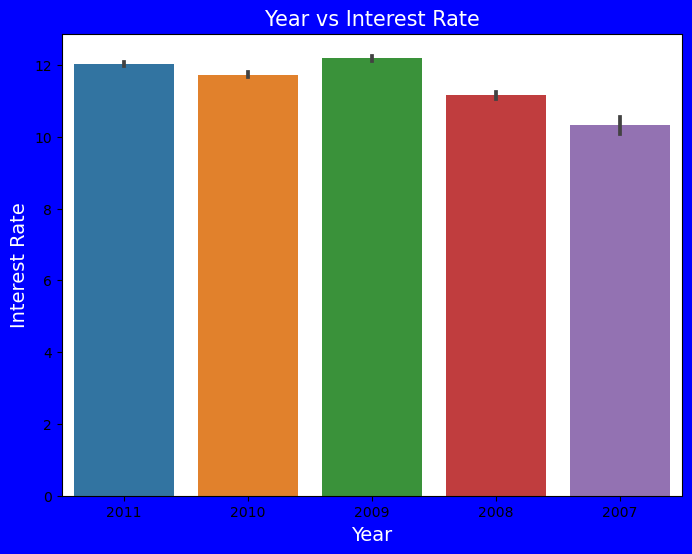

In [89]:
#Year vs Interest Rate
plt.figure(figsize=(8,6),facecolor='b')
ax = sns.barplot(y='int_rate', x='issue_year', data =loan)
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

### Observation
The above plot shows that interest rate was highest in 2009 and 2011.

In [90]:
# Month of Loan Vs Chargedoff_Proportion -

month_vs_loan = loan.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().reset_index()
month_vs_loan['Total'] = month_vs_loan['Charged Off'] + month_vs_loan['Fully Paid'] 
month_vs_loan['Chargedoff_Proportion'] = month_vs_loan['Charged Off'] / month_vs_loan['Total']
month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,12,674,3501,4175,0.161437
7,5,462,2425,2887,0.160028
11,9,545,2918,3463,0.157378
1,10,572,3137,3709,0.154219
8,6,480,2666,3146,0.152575
2,11,594,3375,3969,0.149660
9,7,475,2846,3321,0.143029
10,8,465,2898,3363,0.138269
0,1,317,2037,2354,0.134664
6,4,368,2440,2808,0.131054


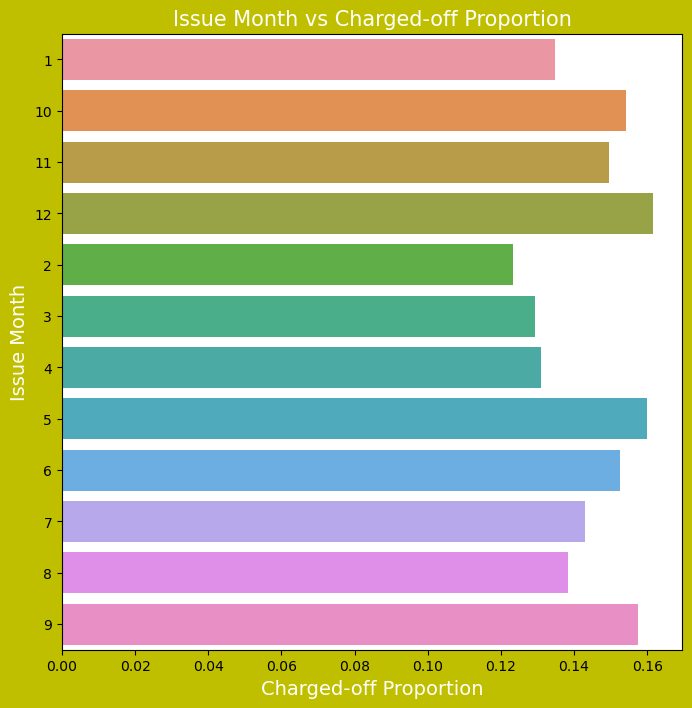

In [91]:
#Issue Month vs Charged Off proportion
fig, ax1 = plt.subplots(figsize=(8, 8),facecolor='y')

ax1.set_title('Issue Month vs Charged-off Proportion',fontsize=15,color = 'w')

ax1=sns.barplot(y="issue_month", x="Chargedoff_Proportion", data=month_vs_loan)

ax1.set_xlabel('Charged-off Proportion',fontsize=14,color = 'w')

ax1.set_ylabel('Issue Month',fontsize=14,color='w')

plt.show()

### Observation
The above plot shows that more number of charged offs were in December, May and September. In these months interest rates were also slightly higher.

In [92]:
loan.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
loan_amnt_cats               category
annual_inc_cats              category
int_rate_cats                category
dti_cats                     category
fnded_Amnt_Category          category
InstallmentCateg               object
dti_category                   object
issue_year                     object
issue_month                    object
dtype: objec

In [93]:
# Empl Length Vs Chargedoff_Proportion -

emp_lngth_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().reset_index()
emp_lngth_vs_loan['Total'] = emp_lngth_vs_loan['Charged Off'] + emp_lngth_vs_loan['Fully Paid'] 
emp_lngth_vs_loan['Chargedoff_Proportion'] = emp_lngth_vs_loan['Charged Off'] / emp_lngth_vs_loan['Total']
emp_lngth_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
9,10.0,1316,7038,8354,0.157529
6,7.0,262,1435,1697,0.154390
4,5.0,456,2712,3168,0.143939
7,8.0,203,1216,1419,0.143058
0,1.0,1090,6532,7622,0.143007
5,6.0,305,1846,2151,0.141795
2,3.0,551,3426,3977,0.138547
3,4.0,456,2859,3315,0.137557
1,2.0,561,3684,4245,0.132155
8,9.0,157,1058,1215,0.129218


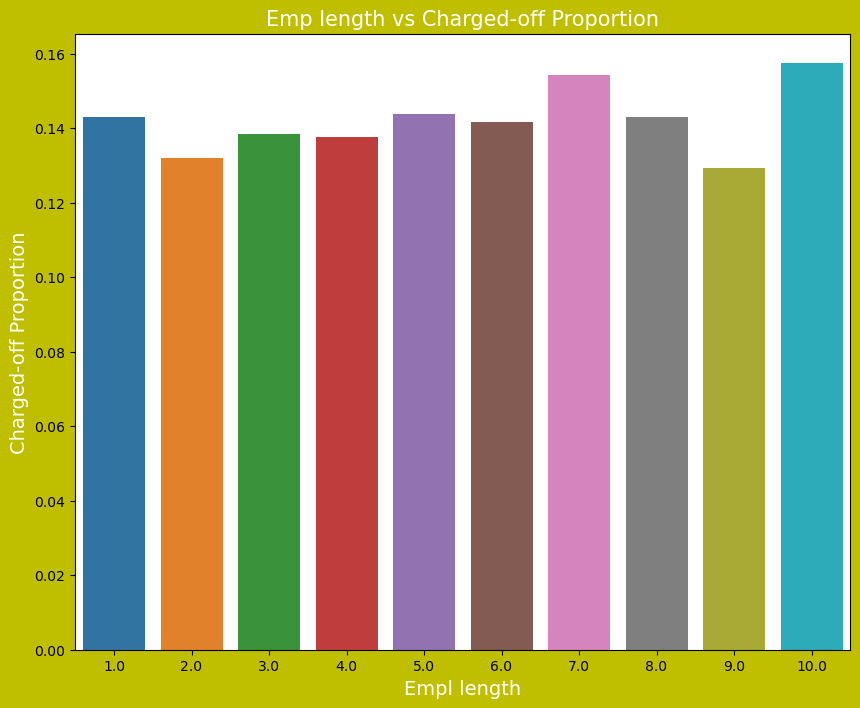

In [94]:
#Purpose of Loan vs Charged Off proportion
fig, ax1 = plt.subplots(figsize=(10, 8),facecolor='y')

ax1.set_title('Emp length vs Charged-off Proportion',fontsize=15,color = 'w')

ax1=sns.barplot(x="emp_length", y="Chargedoff_Proportion", data=emp_lngth_vs_loan)

ax1.set_ylabel('Charged-off Proportion',fontsize=14,color = 'w')

ax1.set_xlabel('Empl length',fontsize=14,color='w')

plt.show()

<Axes: xlabel='Count', ylabel='emp_length'>

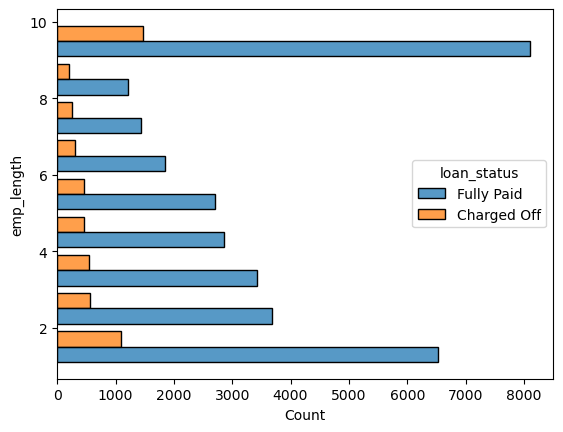

In [95]:
loan['emp_length'] = loan['emp_length'].astype(float)
sns.histplot(binwidth=1, y="emp_length", hue="loan_status", data=loan, stat="count", multiple="dodge", shrink=.8)


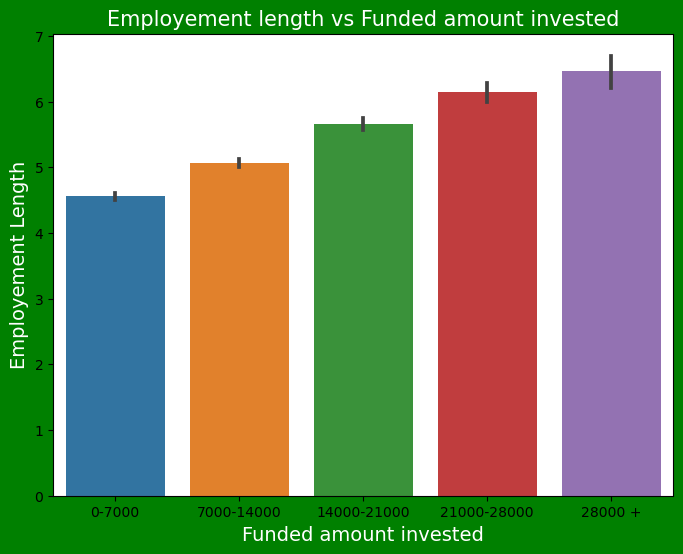

In [96]:
plt.figure(figsize=(8,6),facecolor='g')
ax = sns.barplot(y='emp_length', x='fnded_Amnt_Category', data =loan)
ax.set_title('Employement length vs Funded amount invested',fontsize=15,color='w')
ax.set_ylabel('Employement Length',fontsize=14,color = 'w')
ax.set_xlabel('Funded amount invested',fontsize=14,color = 'w')
plt.show()

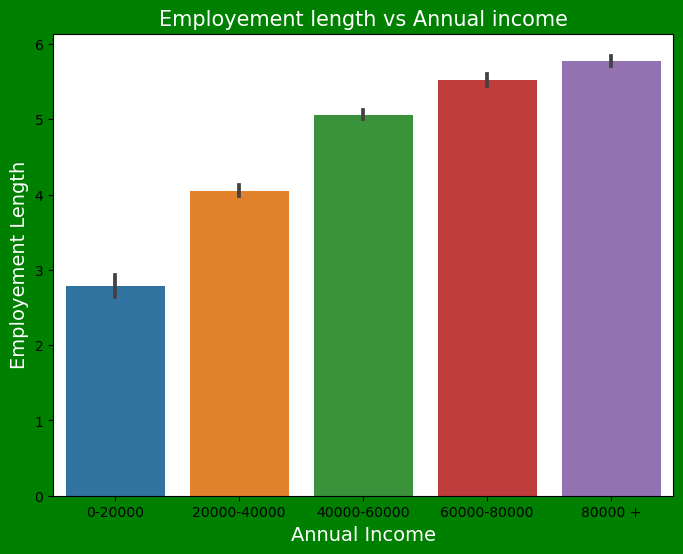

In [97]:
plt.figure(figsize=(8,6),facecolor='g')
ax = sns.barplot(y='emp_length', x='annual_inc_cats', data =loan)
ax.set_title('Employement length vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Employement Length',fontsize=14,color = 'w')
ax.set_xlabel('Annual Income',fontsize=14,color = 'w')
plt.show()

### Observation
The above two graphs shows that more the employement length(experience) more will be the annual income and hence more the funded amount invested.
This might be the reason of more charged off percentage for more employment length.